In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('./datasets/Dataset - Updated.csv')
df

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,High
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,High
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,High
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,High


## Data understanding

In [4]:
[col for col in df.columns]

['Age',
 'Systolic BP',
 'Diastolic',
 'BS',
 'Body Temp',
 'BMI',
 'Previous Complications',
 'Preexisting Diabetes',
 'Gestational Diabetes',
 'Mental Health',
 'Heart Rate',
 'Risk Level']

`Features: `

1. **Age** - вік вагітної жінки
2. **Systolic BP** - верхній тиск
3. **Diastolic** - нижній тиск
4. **BS** -  рівень цукру в крові
5. **Body Temp** - температура тіла
6. **BMI** - індекс маси тіла
7. **Previous Complications** - будь-які ускладення або скарги, 0 - немає, 1 - були/є
8. **Preexisting Diabetes** - попередньо діагностований діабет до вагітності, 0 - не було, 1 - був
9. **Gestational Diabetes** - діабет діагностований під час вагітності, 0 - не розвинувся, 1 - розвинувся
10. **Mental Health** - ментальне здоров'я, 0 - є проблеми, 1 - жодних скарг
11. **Heart Rate** - серцевий ритм
12. **Risk Level** - чи присутні ускладення вагітності (цільова ознака)

There are few features that can change though the day or even though one hour, such as blood pressure, sugar, temperature, heart rate. And rest of them are kinda stable, so cant change that much. All of features will be treated as usual, just wanted to make note that all features will be count as avegare.

## Data preprocessing

### Missing values

In [5]:
print(df.isnull().sum())

Age                        0
Systolic BP                5
Diastolic                  4
BS                         2
Body Temp                  0
BMI                       18
Previous Complications     2
Preexisting Diabetes       2
Gestational Diabetes       0
Mental Health              0
Heart Rate                 2
Risk Level                18
dtype: int64


In [6]:
print(df.shape[0]-df.dropna(axis=0).shape[0])

39


Im going to simply delete elements with missing values, because there is only 39 of such.

In [7]:
df=df.dropna(axis=0)
df.shape

(1166, 12)

### Categorical encoding

There is only one column 'Risk Level' with 'High' and 'Low' values. 

In [8]:
df['Risk Level'].value_counts()

Risk Level
Low     702
High    464
Name: count, dtype: int64

There is not any wrong categorical values (categorical anomalieses), only 'High' and 'Low' values

In [9]:
df.loc[:,'Risk Level']=df['Risk Level'].apply(lambda elem: 0 if elem=='Low' else 1)
df

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,1
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,1
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,1
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,1
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,1


### Anomalies detection

Box and violin plots for visualization

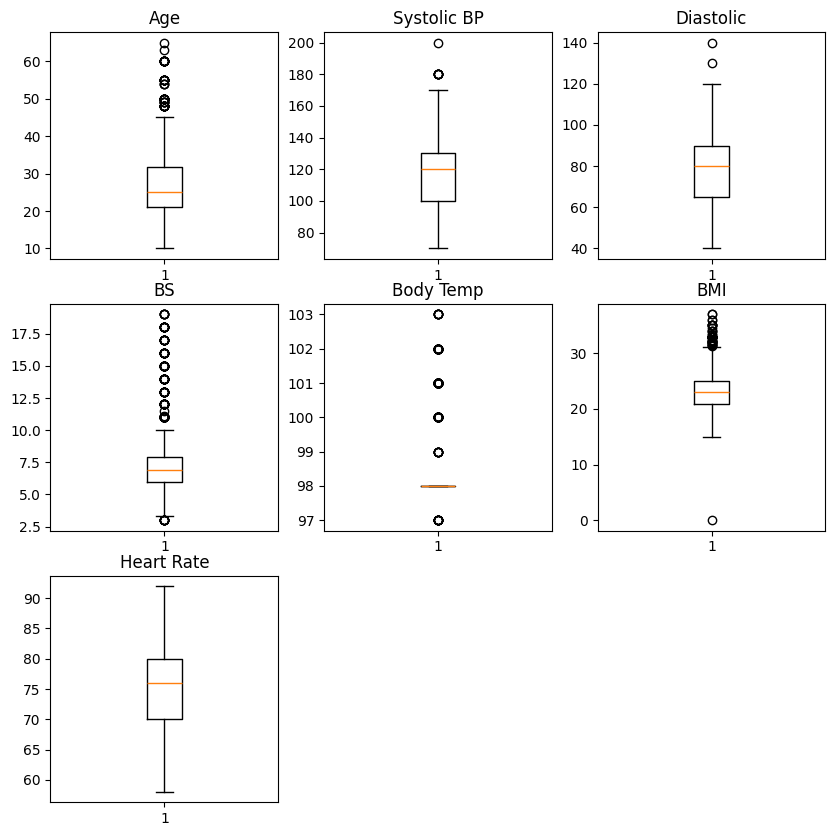

In [10]:
plt.figure(figsize=(10,10))
for ind,col in enumerate(df.columns[[0,1,2,3,4,5,10]]):
    plt.subplot(3,3,ind+1)
    plt.title(col)
    plt.boxplot(df[col])

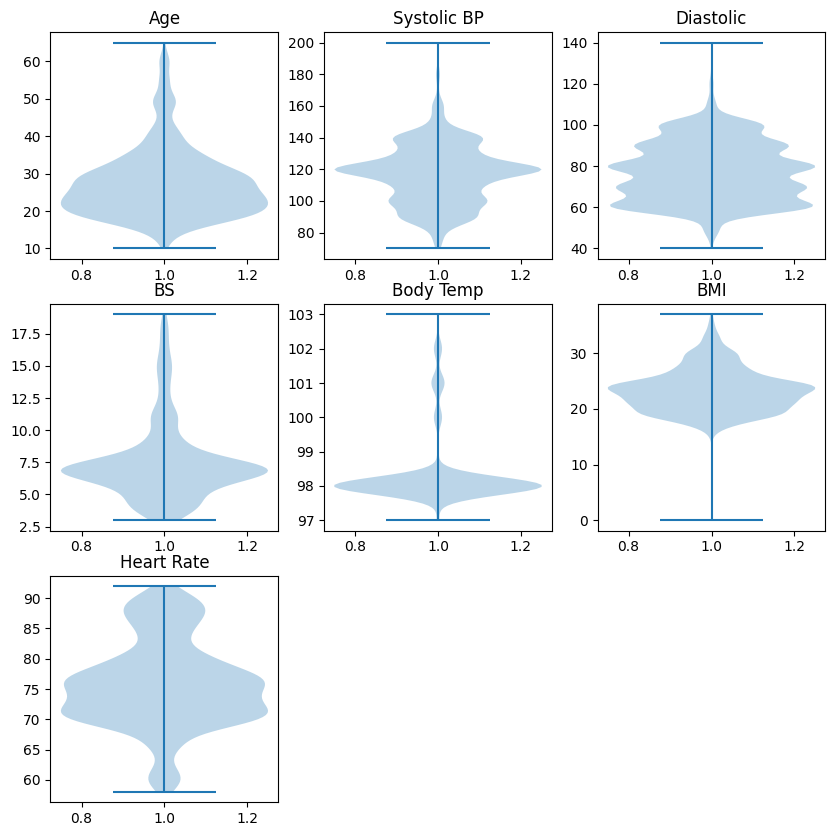

In [11]:
plt.figure(figsize=(10,10))
for ind,col in enumerate(df.columns[[0,1,2,3,4,5,10]]):
    plt.subplot(3,3,ind+1)
    plt.title(col)
    plt.violinplot(df[col])

#### Age

In [12]:
df[df['Age']<18]['Age'].value_counts()

Age
17    46
15    20
12     9
16     8
13     4
10     1
Name: count, dtype: int64

#### BMI

In [13]:
df[df['BMI']==0]

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
952,24,110.0,70.0,5.1,100,0.0,0.0,1.0,0,0,78.0,0


In [14]:
df=df[df['BMI']!=0]
df.shape[0]

1165

There is only one anomaly and its row above, where BMI=0, that cant be possible. Also columns with blood pressure and sugar in blood have some extreme values, but i think in case of pregnancy that can be possible. So only one anomaly in whole dataset

#### Blood pressure

In [15]:
print(df[(df['Systolic BP']>140)|(df['Diastolic']<60)].iloc[:,-1].value_counts())

Risk Level
1    57
0    20
Name: count, dtype: int64


Numbe of high risk pregrancies with abnormal blood pressure looks good, like there is nothing strange

#### Blood sugar

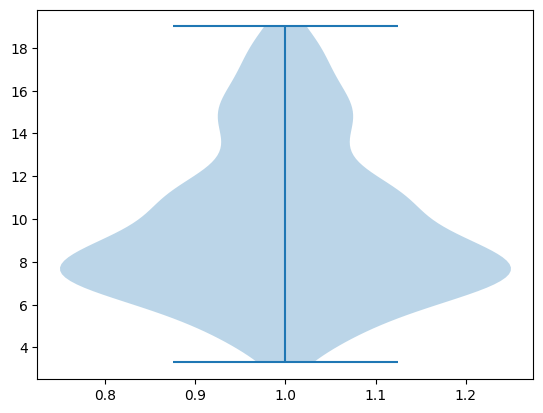

In [16]:
sugar_with_diab=df[(df['Gestational Diabetes']==1) | (df['Preexisting Diabetes']==1)].loc[:,'BS']
plt.figure()
plt.violinplot(sugar_with_diab)
plt.show()

In [17]:
print(f'Number of women with some form of diabetes: {sugar_with_diab.__len__()}')
print(f'Number of women with higher sugar and diabetes: {sum(sugar_with_diab>7)}')

Number of women with some form of diabetes: 441
Number of women with higher sugar and diabetes: 321


In [18]:
diabs_with_high_risk=df[((df['Gestational Diabetes']==1) | (df['Preexisting Diabetes']==1)) & df['Risk Level']==1].loc[:,'BS']
print(f'High risk with diabetes and higher sugar: {diabs_with_high_risk.__len__()}')

High risk with diabetes and higher sugar: 417


#### Diabetes

In [19]:
print('Number of women that have diabetes, but doesnt have temporary diabetes')
df[(df['Preexisting Diabetes']==1) & (df['Gestational Diabetes']==0)].shape[0]

Number of women that have diabetes, but doesnt have temporary diabetes


304

In [20]:
print('Number of women that doesnt have diabetes, but have temporary diabetes')
df[(df['Preexisting Diabetes']==0) & (df['Gestational Diabetes']==1)].shape[0]

Number of women that doesnt have diabetes, but have temporary diabetes


104

In [21]:
print('Number of women that have some form of diabetes')
df[(df['Preexisting Diabetes']==1) & (df['Gestational Diabetes']==1)].shape[0]

Number of women that have some form of diabetes


33

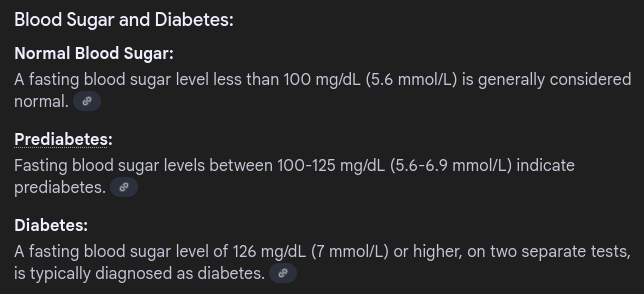

* Overall i think situaltion with sugar levels, presence of diabetes and higher pregnancy risk doesnt look suspicious.</br>
* As conclusion there was only one anomaly, and that was where BMI equals 0, also generally speaking data looks good and reliable.

In [22]:
df.to_csv('./datasets/pregnancies_prep.csv',index=False)

## Training

In [23]:
import pandas as pd
df=pd.read_csv('./datasets/pregnancies_prep.csv')
df

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,1
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1160,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,1
1161,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,1
1162,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,1
1163,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,1


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
# Turning data into tensors
x_train,x_temp,y_train,y_temp=train_test_split(df.drop('Risk Level',axis=1),df['Risk Level'],random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

x_train_ten=torch.from_numpy(x_train.to_numpy()).type(torch.float32)
y_train_ten=torch.from_numpy(y_train.to_numpy()).type(torch.float32).unsqueeze(1)

x_test_ten=torch.from_numpy(x_test.to_numpy()).type(torch.float32)
y_test_ten=torch.from_numpy(y_test.to_numpy()).type(torch.float32).unsqueeze(1)

x_val_ten=torch.from_numpy(x_val.to_numpy()).type(torch.float32)
y_val_ten=torch.from_numpy(y_val.to_numpy()).type(torch.float32).unsqueeze(1)

train_dataset=TensorDataset(x_train_ten,y_train_ten)
test_dataset=TensorDataset(x_test_ten,y_test_ten)

train_loader=DataLoader(train_dataset,10,True)
test_loader=DataLoader(test_dataset,5,True)

In [26]:
class Pregnancies_NN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super().__init__()
        self.W1=nn.Parameter(torch.randn(input_size,hidden_size),requires_grad=True)
        self.B1=nn.Parameter(torch.zeros(hidden_size),requires_grad=True)
        self.W2=nn.Parameter(torch.randn(hidden_size,output_size),requires_grad=True)
        self.B2=nn.Parameter(torch.zeros(output_size),requires_grad=True)

        self.relu=nn.ReLU()

    def forward(self,input):
        z1=torch.matmul(input,self.W1)+self.B1
        a1=self.relu(z1)
        z2=torch.matmul(a1,self.W2)+self.B2
        return z2

In [27]:
# Function for training and evaluating model`s accuracy
def evaluate_architecture(epochs,NN_Class,input_size,hidden_size,output_size,train_loader,test_loader,plot_number,total_plots,dev='cpu'):
    torch.manual_seed(42)
    train_losses=[]
    test_losses=[]
    loss_func=nn.BCEWithLogitsLoss()
    model=NN_Class(input_size,hidden_size,output_size)
    model.to(dev)
    optimizer=optim.Adam(model.parameters())
    interval=max(1,epochs//250)

    for epoch in range(epochs):

        model.train()
        epoch_train_loss=0
        for x_batch,y_batch in train_loader:
            x_batch,y_batch=x_batch.to(dev),y_batch.to(dev)
            preds=model(x_batch)
            loss=loss_func(preds,y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_train_loss+=loss.item()
        epoch_train_loss/=len(train_loader)        

        model.eval()
        epoch_test_loss=0
        with torch.inference_mode():
            for x_batch,y_batch in test_loader:
                x_batch,y_batch=x_batch.to(dev),y_batch.to(dev)
                preds=model(x_batch)
                epoch_test_loss+=loss_func(preds,y_batch).item()
        epoch_test_loss/=len(test_loader)

        if epoch%interval==0 or epoch==epochs-1:
            train_losses.append(epoch_train_loss)
            test_losses.append(epoch_test_loss)

    plt.subplot(total_plots,2,plot_number+1)
    plt.plot(train_losses,label=f'train loss: {train_losses[-1]:.2f}')
    plt.plot(test_losses,label=f'test loss: {test_losses[-1]:.2f}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Plot number: {plot_number+1} | Epochs: {epochs} | Hidden size: {hidden_size}')

Epochs: 200, Hidden size: 8
Epochs: 200, Hidden size: 16
Epochs: 200, Hidden size: 32
Epochs: 200, Hidden size: 64


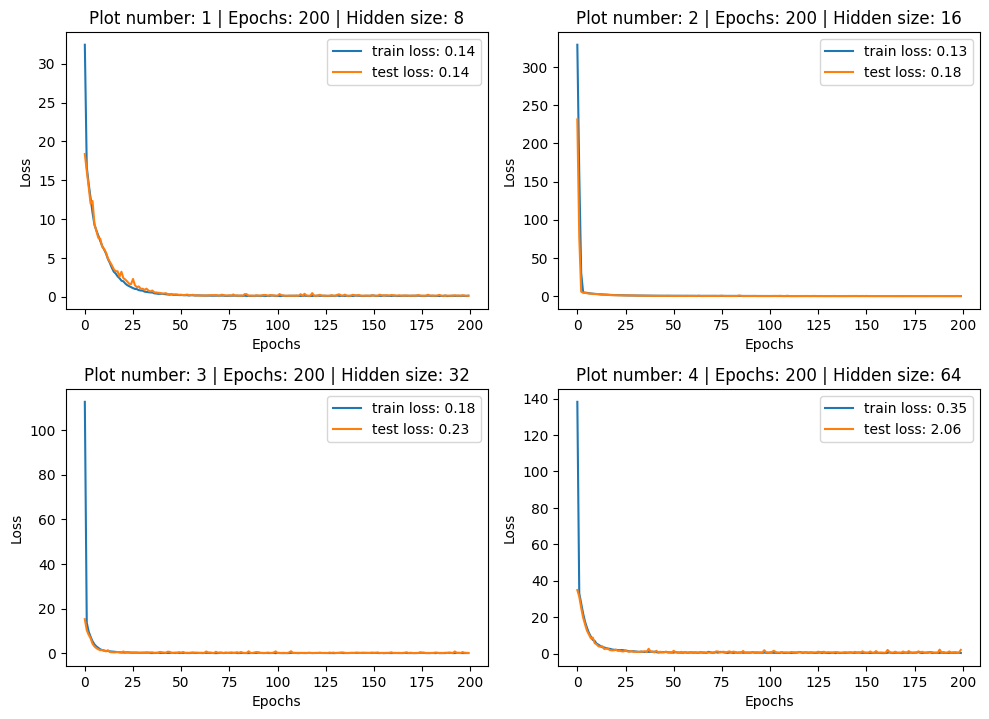

In [28]:
import itertools
epochs=[200]
hidden_sizes=[8,16,32,64]
plot_number=0
total_plots=len(list(itertools.product(hidden_sizes,epochs)))
plt.figure(figsize=(10,(total_plots//2*7)))
for h,e in itertools.product(hidden_sizes,epochs):
    print(f'Epochs: {e}, Hidden size: {h}')
    evaluate_architecture(e,Pregnancies_NN,11,h,1,train_loader,test_loader,plot_number,total_plots)
    plot_number+=1
plt.tight_layout()
plt.show()

* Using GPU for training neural network in this case is useless. Because dataset is really small, neural network is compact and overall this task is not that hard. So for training CPU was used.
* I think that i will choose parameters from plot number 1, and will train only on 50 epochs. There is nice curve and dont want choose way to much overfitted neural network
* Also mini-batch gradient descent were used, for maximizing neural network`s metrics, because dataset is really small

## Validation

In [29]:
class Pregnancies_NN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super().__init__()
        self.W1=nn.Parameter(torch.randn(input_size,hidden_size),requires_grad=True)
        self.B1=nn.Parameter(torch.zeros(hidden_size),requires_grad=True)
        self.W2=nn.Parameter(torch.randn(hidden_size,output_size),requires_grad=True)
        self.B2=nn.Parameter(torch.zeros(output_size),requires_grad=True)

        self.relu=nn.ReLU()

    def forward(self,input):
        z1=torch.matmul(input,self.W1)+self.B1
        a1=self.relu(z1)
        z2=torch.matmul(a1,self.W2)+self.B2
        return z2

In [30]:
# Edited function for training
def train_nn(epochs,NN_Class,input_size,hidden_size,output_size,train_loader,test_loader):
    torch.manual_seed(42)
    train_losses=[]
    test_losses=[]
    loss_func=nn.BCEWithLogitsLoss()
    model=NN_Class(input_size,hidden_size,output_size)
    optimizer=optim.Adam(model.parameters())
    interval=max(1,epochs//250)

    for epoch in range(epochs):

        model.train()
        epoch_train_loss=0
        for x_batch,y_batch in train_loader:
            preds=model(x_batch)
            loss=loss_func(preds,y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_train_loss+=loss.item()
        epoch_train_loss/=len(train_loader)        

        model.eval()
        epoch_test_loss=0
        with torch.inference_mode():
            for x_batch,y_batch in test_loader:
                preds=model(x_batch)
                epoch_test_loss+=loss_func(preds,y_batch).item()
        epoch_test_loss/=len(test_loader)

        if epoch%interval==0 or epoch==epochs-1:
            train_losses.append(epoch_train_loss)
            test_losses.append(epoch_test_loss)

    plt.figure(figsize=(5,5))
    plt.plot(train_losses,label=f'train loss: {train_losses[-1]:.2f}')
    plt.plot(test_losses,label=f'test loss: {test_losses[-1]:.2f}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    return model

Metrics on validation dataset
Recall score: 0.889
F1 score: 0.909
Log loss: 0.096
Confusion matrix: 
[[98  3]
 [ 5 40]]


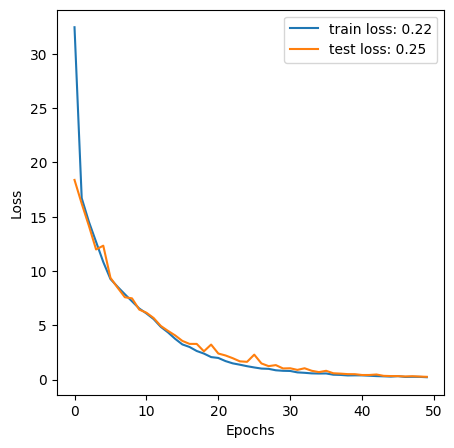

In [34]:
from sklearn.metrics import recall_score,f1_score,log_loss,confusion_matrix
neural_network=train_nn(50,Pregnancies_NN,11,8,1,train_loader,test_loader)

with torch.inference_mode():
    logits=neural_network(x_val_ten)
    sigms=torch.sigmoid(logits)
    preds=(sigms>=0.5).long()
print('Metrics on validation dataset')
print(f'Recall score: {recall_score(y_val_ten.numpy(),preds.detach().numpy()):.3f}')
print(f'F1 score: {f1_score(y_val_ten.numpy(),preds.detach().numpy()):.3f}')
print(f'Log loss: {log_loss(y_val_ten.numpy(),sigms.numpy()):.3f}')
print(f'Confusion matrix: {'\n'}{confusion_matrix(y_val_ten.numpy(),preds.detach().numpy())}')

In [ ]:
torch.save(obj=neural_network.state_dict(),f='./src/network_weights.pth')